# TP Quantitative Behaviors in Quantitative Temporal Logic FOLTL(Rlin)

* validity domain of FO-LTL(Rlin) constraints on a trace
* continuous satisfaction degree
* robustness and sensitivity to parameter variations (extrinsic variaiblity)
* sensitivity to stochasticity (intrinsic variability²)

## MAPK Signalling model

F. Fages, 2019-2022

- Quantitative temporal logic FOLTL(Rlin)
- Validity domains of FOLTL(Rlin) constraints
- Continuous satisfaction degree
- Robustness with respect to parameter variations
- Sensivitity to parameter values
- Parameter search

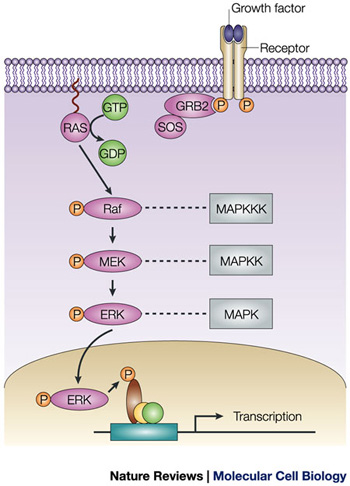

## Model 9 in BioModels 

after Huang CY, Ferrell JE Jr

Ultrasensitivity in the mitogen-activated protein kinase cascade.

Proc. Natl. Acad. Sci. U.S.A. 1996:93(19):10078-83

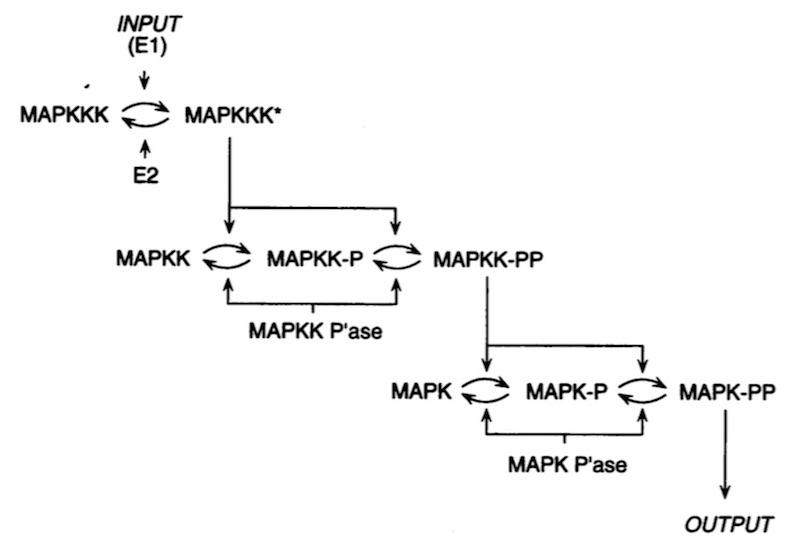

Model reduced here by removing decomplexation reactions 
* reduction preserving CTL specification (see TD3) 

In [ ]:
load(BIOMD9renamedCTLreduced.bc).

In [ ]:
list_model.

# Differential semantics
## Functions of time
* showing stabilization and signal amplification

In [ ]:
option(time: 100).
numerical_simulation. 
plot.

## Input/output functions
* stiffer sigmoids on the 2nd and 3rd levels
* showing all-or-nothing switch at the 3rd level (output of the signaling network)
* acting as an analog-digital converter 

In [ ]:
option(show: {KKKp, KKpp, Kpp}). 
dose_response(E1, 1e-7, 5e-5, time:1000).

## Trajectories toward output stabilization

In [ ]:
numerical_simulation. 
plot.

# Behavioural Specifications in Quantitative Temporal Logic FO-LTL(Rlin)
* *First-Order Linear Time Logic* with free variables and *linear constraints* over the reals
* Real-valued states (concentrations of molecular species)
* Bounded model-checking: validity of LTL formulae on a finite trace completed with a loop on the last state


## Validity domains of FOLTL(Rlin) constraint variables
* FO-LTL(Rlin) constraint solving: validity domain for variables

In [ ]:
validity_domain(F(Kpp = v)). % all values in the trace

In [ ]:
validity_domain(F(G(Kpp = v))). % last value of Kpp on the trace (stable value)

In [ ]:
% times of last value
validity_domain(F(Time = t /\ G(Kpp = v))). 

In [ ]:
% time bound for last value
validity_domain(F(Time <= t /\ G(Kpp = v))). 

In [ ]:
% switching time
validity_domain(F(Time <= t /\ G(Kpp > 0.5))). 

## Satisfaction degree of FOLTL(Rlin) formulae
* FOLTL(Rlin) constraint given objective values for the free variables
* satisfaction degree in [0,1] as the inverse of the distance between the objective point and the validity domain
* satisfaction degree in[1, +inf[ as the penetration depth of the objective point in the validity domain (i.e. formula robustness)

In [ ]:
satisfaction_degree(F(Time < t /\ G(Kpp > 0.5)), [t->14.1372]).

In [ ]:
satisfaction_degree(F(Time < t /\ G(Kpp > 0.5)), [t->10]).

In [ ]:
satisfaction_degree(F(Time < t /\ G(Kpp > 0.5)), [t->20]).

## Robustness of FOLTL(Rlin) formulae with respect to parameter variations (i.e. extrinsic variability)
* Here robustness of the switching time property with respect to variation of the input concentration
* Default coefficient of variation is 0.1 (i.e. variation of parameter values by 10%)

In [ ]:
present(E1, e1).
parameter(e1=3e-5).

In [ ]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [e1], [t-> 14.2459]).

In [ ]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [e1], [t-> 14.2459], robustness_coeff_var: 0.2).

In [ ]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [e1], [t-> 14.2459], robustness_coeff_var: 0.3).

### Robustness w.r.t. variation of kinetic parameters by 10%

In [ ]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [a1, c1, a2, c2], [t-> 14.2459]).

## Parameter search for satisfying an FOLTL(Rlin) constraint with objective values
* Explores the search space of parameters in order to satisfy a FOLTL(Rlin) formula
* Uses a black-box continuous optimization algorithm to maximize the satisfaction degree 
* BIOCHAM uses CMAES (covariance matrix adaptive evolution strategy) 

#### E.g. find kinetic parameters a1, c1, a2, c2 for having a switching time before 10

In [ ]:
load(BIOMD9renamedCTLreduced.bc).
option(method: bsimp).
numerical_simulation. plot.

In [ ]:
seed(0).
search_parameters(F(Time < t /\ G(Kpp > 0.5)), 
    [10<=a1<=1e4, 10<=c1<=1e4, 10<=a2<=1e4, 10<=c2<=1e4], 
    [t-> 10]).

In [ ]:
numerical_simulation. plot.

In [ ]:
% switching time
validity_domain(F(Time <= t /\ G(Kpp > 0.5))). 

## Dose-response diagram
* with a long time horizon for reaching the stable state with low values for E1

In [ ]:
option(time:1000).
dose_response(E1, 1e-7, 5e-5).

In [ ]:
present(E1,e1). 
parameter(e1=3e-5).

## Question 1) Find the critical value of input E1 to get an output concentration of Kpp=0.5
* as shown by the dose-response diagram there is one value of e1 for reaching that stable state 0.5
* determine that value by search_parameters
* explain why the search without the option cmaes_log_normal distribution set to yes

## Question 2) Evaluate the robustness of that threshold value for E1 

## Question 3) Determine to which kinetic parameters and initial concentrations that critical value for E1 is most sensitive